# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing DataSet

In [2]:
df0 = pd.read_csv("CarPrice_Assignment.csv")

# Statistical Analysis

In [3]:
df0.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df0.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Data Preprocessing

<AxesSubplot:>

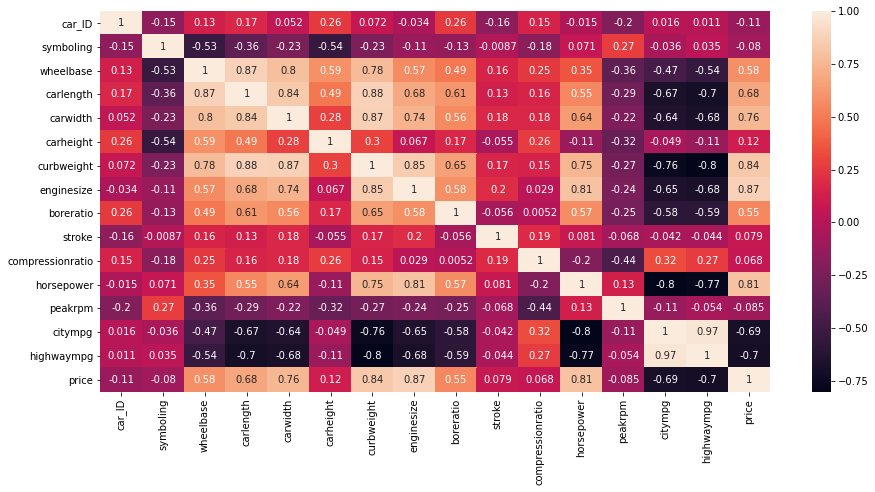

In [5]:
plt.figure(figsize = (15,7))
sns.heatmap(df0.corr(),annot = True)

## Feature Selection

In [6]:
df1 = df0.drop(['car_ID', 'CarName','doornumber', 'drivewheel', 'enginelocation', 'wheelbase',
                'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'fuelsystem','peakrpm', 'citympg','aspiration','carbody'],axis = 1)

In [7]:
df1.head()

,symboling,fueltype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,highwaympg,price
0,3,gas,four,130,3.47,2.68,9.0,111,27,13495.0
1,3,gas,four,130,3.47,2.68,9.0,111,27,16500.0
2,1,gas,six,152,2.68,3.47,9.0,154,26,16500.0
3,2,gas,four,109,3.19,3.40,10.0,102,30,13950.0
4,2,gas,five,136,3.19,3.40,8.0,115,22,17450.0


<AxesSubplot:>

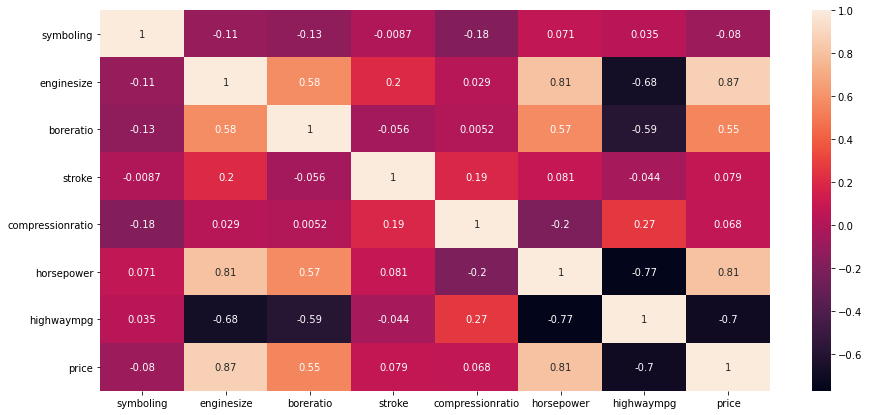

In [8]:
plt.figure(figsize = (15,7))
sns.heatmap(df1.corr(),annot = True)

# Univariate Analysis

In [9]:
df1.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

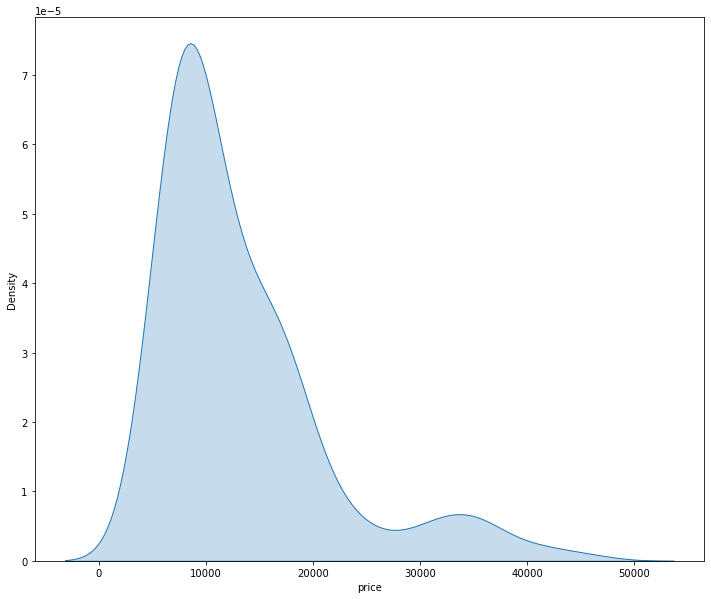

In [10]:
plt.figure(figsize = (12,10))
sns.kdeplot(x = 'price',data = df1,shade = True)

- price is slightly skewed so we have to normalize it

In [11]:
df1.price = np.log(df1.price)

In [12]:
df1.price.describe()

count    205.000000
mean       9.354679
std        0.503805
min        8.540519
25%        8.960339
50%        9.239414
75%        9.711297
max       10.723267
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

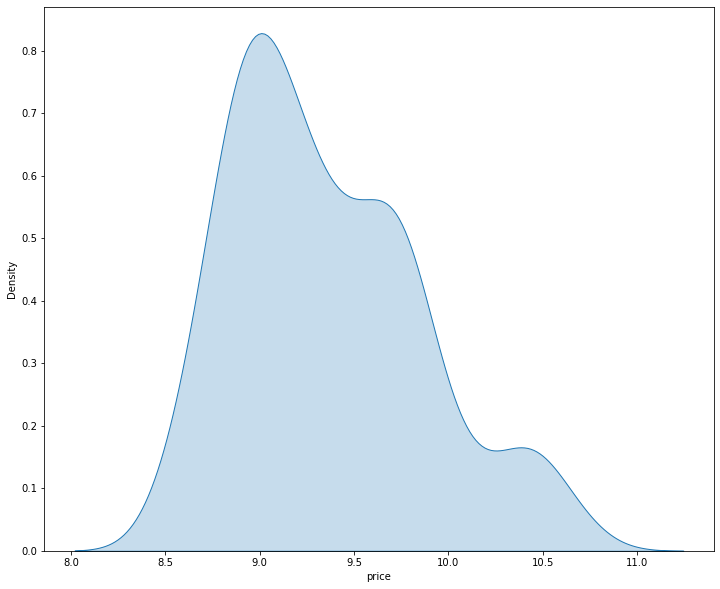

In [13]:
plt.figure(figsize = (12,10))
sns.kdeplot(x = 'price',data = df1,shade = True)

- It looks like almost Gussian Curve

<AxesSubplot:xlabel='fueltype', ylabel='count'>

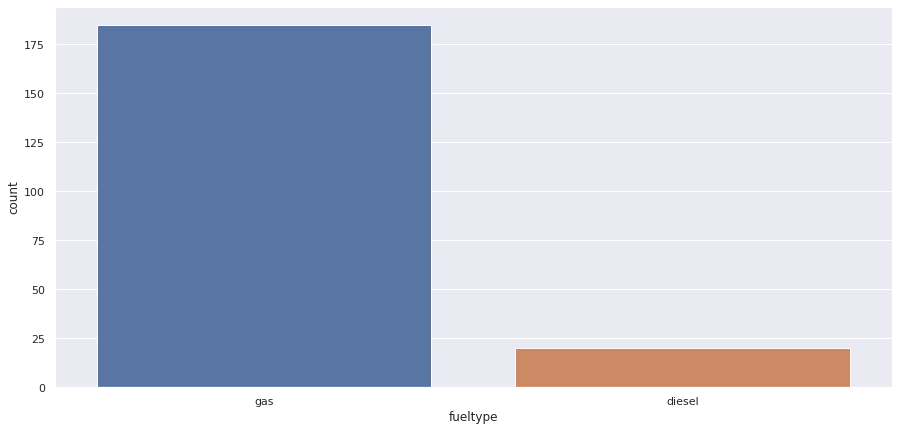

In [14]:
plt.figure(figsize = (15,7))
sns.set()
sns.countplot(x = df1.fueltype)

- Most people are buying Gas Car

<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

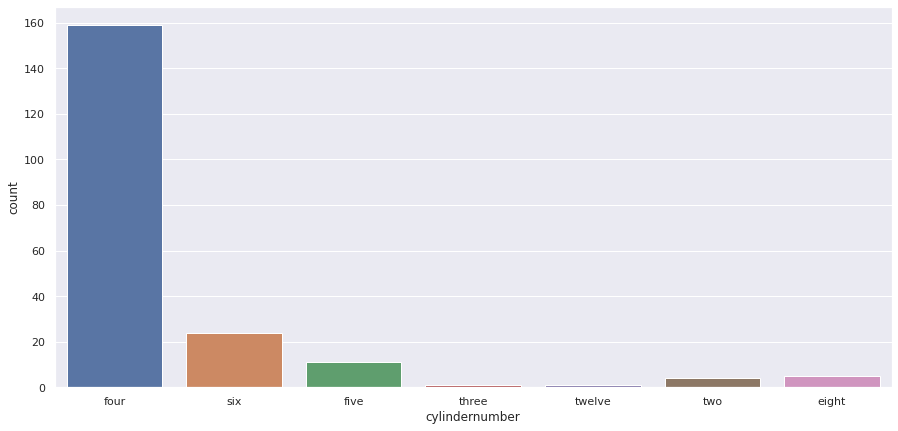

In [15]:
plt.figure(figsize = (15,7))
sns.set()
sns.countplot(x = df1.cylindernumber)

- More people are buying 4 Cylinder Car

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

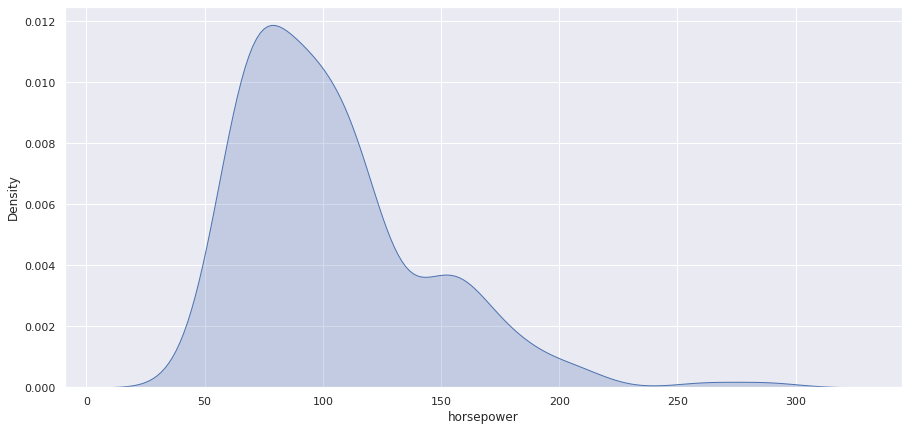

In [16]:
plt.figure(figsize = (15,7))
sns.set()
sns.kdeplot(x = df1.horsepower,shade = True)

- Avegage horse Power is around 55-60

<AxesSubplot:xlabel='highwaympg', ylabel='Density'>

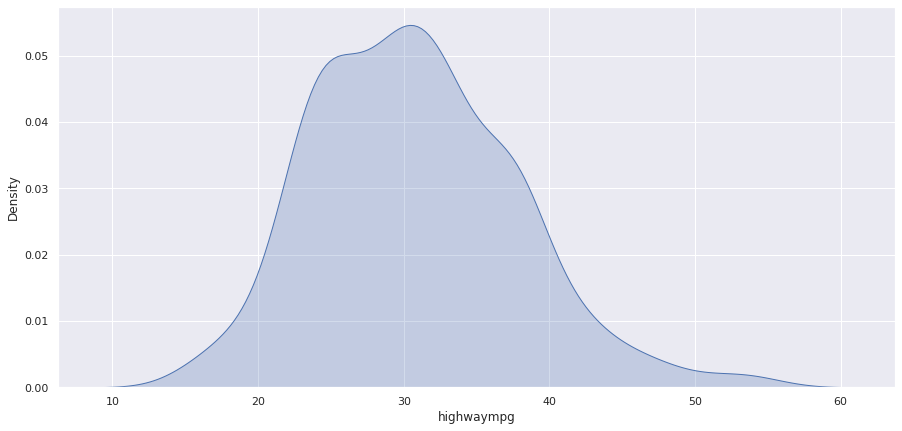

In [17]:
plt.figure(figsize = (15,7))
sns.set()
sns.kdeplot(x = df1.highwaympg,shade = True)

- Average Mileage is around 30mpg

<AxesSubplot:xlabel='compressionratio', ylabel='Density'>

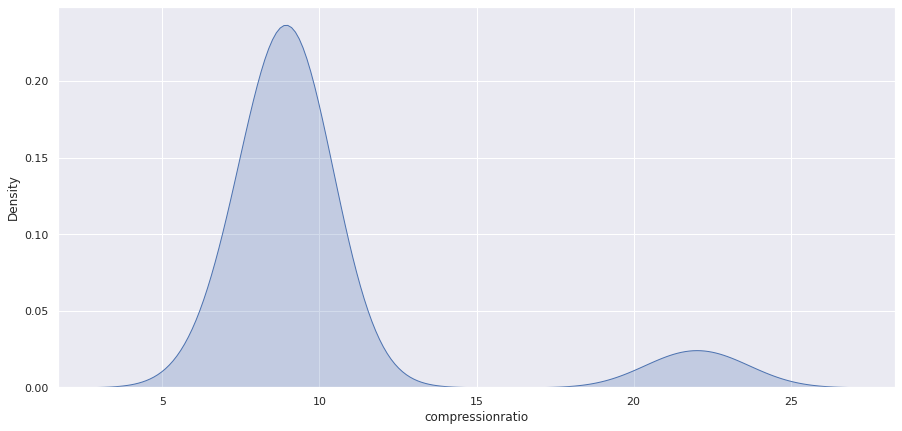

In [18]:
plt.figure(figsize = (15,7))
sns.set()
sns.kdeplot(x = df1.compressionratio,shade = True)

# Bivariate Analysis

In [19]:
df1.head()

,symboling,fueltype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,highwaympg,price
0,3,gas,four,130,3.47,2.68,9.0,111,27,9.510075
1,3,gas,four,130,3.47,2.68,9.0,111,27,9.711116
2,1,gas,six,152,2.68,3.47,9.0,154,26,9.711116
3,2,gas,four,109,3.19,3.40,10.0,102,30,9.543235
4,2,gas,five,136,3.19,3.40,8.0,115,22,9.767095


In [20]:
df2 = pd.get_dummies(df1,['fueltype','cylindernumber'],drop_first = True)

In [21]:
df2.head()

,symboling,enginesize,boreratio,stroke,compressionratio,horsepower,highwaympg,price,fueltype_gas,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,130,3.47,2.68,9.0,111,27,9.510075,1,0,1,0,0,0,0
1,3,130,3.47,2.68,9.0,111,27,9.711116,1,0,1,0,0,0,0
2,1,152,2.68,3.47,9.0,154,26,9.711116,1,0,0,1,0,0,0
3,2,109,3.19,3.40,10.0,102,30,9.543235,1,0,1,0,0,0,0
4,2,136,3.19,3.40,8.0,115,22,9.767095,1,1,0,0,0,0,0


<AxesSubplot:xlabel='stroke', ylabel='price'>

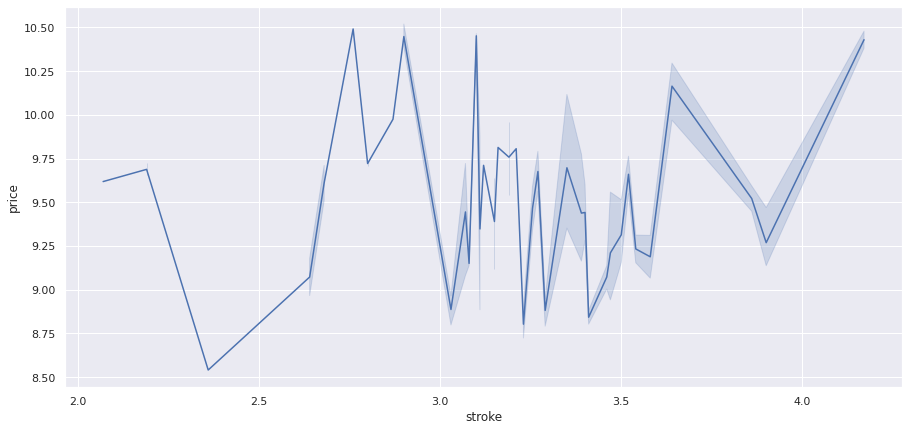

In [22]:
plt.figure(figsize = (15,7))
sns.lineplot(x = 'stroke',y = 'price',data = df1)

<AxesSubplot:xlabel='horsepower', ylabel='price'>

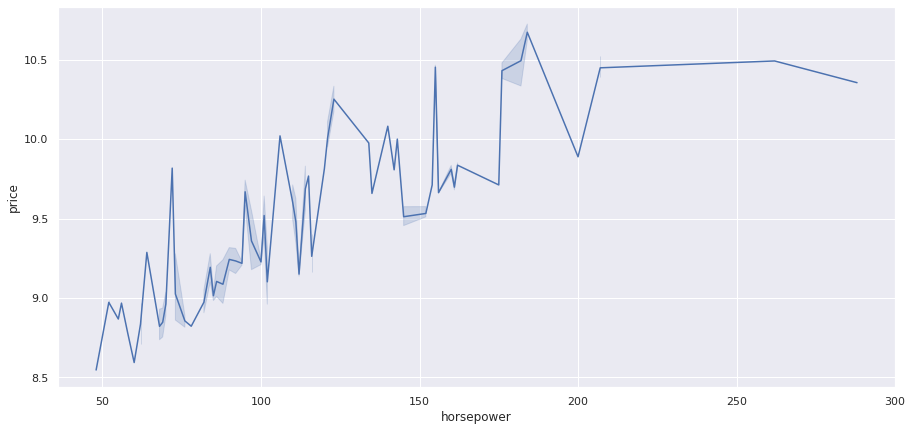

In [23]:
plt.figure(figsize = (15,7))
sns.lineplot(x = 'horsepower',y = 'price',data = df1)

## Spliting Target and Explanatory Variable

In [24]:
Exp_var = df2.loc[:,df2.columns != 'price']
T_V = df2.loc[:,df2.columns == 'price']

# Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(Exp_var,T_V)

# Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [27]:
sc.fit(X_train)

StandardScaler()

In [28]:
x_train_s = sc.transform(X_train)

In [29]:
X_test_s = sc.transform(X_test)

In [30]:
x_train_s = pd.DataFrame(data = x_train_s,columns = Exp_var.columns)

In [31]:
x_train_s

,symboling,enginesize,boreratio,stroke,compressionratio,horsepower,highwaympg,fueltype_gas,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,-0.688678,-0.439752,-0.238785,0.429971,3.058770,-1.190862,0.718828,-3.03315,-0.218964,0.544619,-0.387783,-0.081111,-0.081111,-0.115087
1,-0.688678,-0.190004,-0.021965,0.832125,-0.427406,-0.200897,0.435007,0.32969,-0.218964,0.544619,-0.387783,-0.081111,-0.081111,-0.115087
2,-0.688678,-0.739450,-0.527878,-0.642438,-0.302900,-0.852825,2.279844,0.32969,-0.218964,0.544619,-0.387783,-0.081111,-0.081111,-0.115087
3,1.706043,-0.464727,-0.527878,0.597536,-0.427406,-0.369915,-0.274546,0.32969,-0.218964,0.544619,-0.387783,-0.081111,-0.081111,-0.115087
4,0.109562,-0.140055,0.194854,0.564023,-0.402505,-0.514788,0.151186,0.32969,-0.218964,0.544619,-0.387783,-0.081111,-0.081111,-0.115087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,-0.688678,-0.939248,-1.106065,-0.374336,-0.153493,-0.852825,1.712202,0.32969,-0.218964,0.544619,-0.387783,-0.081111,-0.081111,-0.115087
149,-0.688678,-0.140055,0.194854,0.564023,3.108572,-0.997698,1.570291,-3.03315,-0.218964,0.544619,-0.387783,-0.081111,-0.081111,-0.115087
150,0.109562,-0.764424,-0.672425,0.228895,-0.203295,-0.876971,0.860739,0.32969,-0.218964,0.544619,-0.387783,-0.081111,-0.081111,-0.115087
151,-0.688678,-0.739450,-0.527878,-0.642438,-0.302900,-0.852825,0.860739,0.32969,-0.218964,0.544619,-0.387783,-0.081111,-0.081111,-0.115087


In [32]:
X_test_s = pd.DataFrame(data = X_test_s,columns = X_test.columns)

In [33]:
X_test_s.head()

,symboling,enginesize,boreratio,stroke,compressionratio,horsepower,highwaympg,fueltype_gas,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0.907803,0.109693,0.447811,2.273176,-0.377604,-0.369915,0.009275,0.32969,-0.218964,0.544619,-0.387783,-0.081111,-0.081111,-0.115087
1,0.109562,0.908886,-0.094239,-0.106233,-0.302900,0.378595,-0.842188,0.32969,-0.218964,-1.836145,2.578759,-0.081111,-0.081111,-0.115087
2,-0.688678,-0.489702,0.592357,-1.413233,-0.352703,-0.104315,-0.274546,0.32969,-0.218964,0.544619,-0.387783,-0.081111,-0.081111,-0.115087
3,-0.688678,-0.439752,-0.672425,1.200766,-0.302900,-0.466497,0.293096,0.32969,-0.218964,0.544619,-0.387783,-0.081111,-0.081111,-0.115087
4,0.907803,-0.464727,-0.527878,0.597536,-0.302900,-0.490643,0.435007,0.32969,-0.218964,0.544619,-0.387783,-0.081111,-0.081111,-0.115087


# Model Training

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train_s,y_train)

LinearRegression()

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_s,y_train)

In [35]:
y_pred_train = clf.predict(x_train_s)

In [36]:
y_pred_test = clf.predict(X_test_s)

# Model Evaluation

In [37]:
from sklearn import metrics
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))  

RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)) 

In [38]:
RMSE_test

0.15994904232583287

In [39]:
RMSE_train

0.18421500966015097

In [40]:
clf.score(X_test_s,y_test)*100

89.71743441716978

In [41]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(clf, X_test_s, y_test, cv=cv)

array([0.8515261 , 0.81371393, 0.53597264, 0.86827919, 0.50052206])